

```
# This is formatted as code
```

# Read in Data and Packages

In [169]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bankruptdata.csv to bankruptdata.csv


In [ ]:
import io
bankrupt = pd.read_csv(io.BytesIO(uploaded['bankruptdata.csv']))



```
# This is formatted as code
```

# Exploratory Data Analysis

In [ ]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
bankrupt['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
bankrupt.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [75]:
#keep only ratios
b2 = bankrupt.loc[:, (bankrupt.gt(-2) & bankrupt.lt(2)).all()]
b2.shape

(6819, 72)

In [93]:
cor_matrix = b2.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
b3 = b2.drop(to_drop, axis=1)

In [96]:
x = b3.drop(['Bankrupt?'], axis=1)
y = b3['Bankrupt?']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [170]:
#Model Evaluation Tools

def confusion_matrix(model, x, y, title):
  y_pred=model.predict(x)
  cnf_matrix = metrics.confusion_matrix(y, y_pred)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title(title, y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

def model_metrics(model, xtest, ytest):
  y_pred = model.predict(xtest)
  cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
  print(model)
  print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
  print("  Compare with Null Accuracy:", max(ytest.mean(), 1 - ytest.mean()))
  print("Precision:",metrics.precision_score(ytest, y_pred))
  print("Sensitivity:",metrics.recall_score(ytest, y_pred))
  print("Specificity:", cnf_matrix[0, 0] / (cnf_matrix[0, 0]+ cnf_matrix[0, 1]))
  print("False Positive Rate:", 1 - cnf_matrix[0, 0] / (cnf_matrix[0, 0]+ cnf_matrix[0, 1]))
  print("F1 score:", f1_score(ytest, y_pred))

def model_roc(model, xtest, ytest):
  y_pred = model.predict(xtest)
  y_pred_prob = model.predict_proba(xtest)[:, 1]
  fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_prob)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)

# Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
naivebayes.fit(x_train,y_train)

GaussianNB()

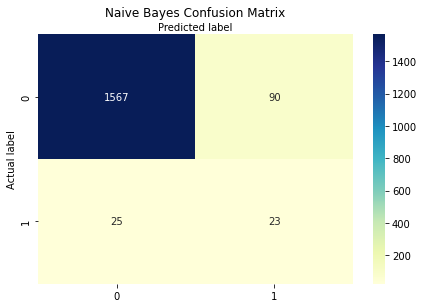

In [134]:
confusion_matrix(naivebayes, x_test, y_test, 'Naive Bayes Confusion Matrix')

In [171]:
model_metrics(naivebayes, x_test, y_test)

GaussianNB()
Accuracy: 0.9325513196480938
  Compare with Null Accuracy: 0.9718475073313783
Precision: 0.20353982300884957
Sensitivity: 0.4791666666666667
Specificity: 0.9456849728424864
False Positive Rate: 0.05431502715751357
F1 score: 0.2857142857142857


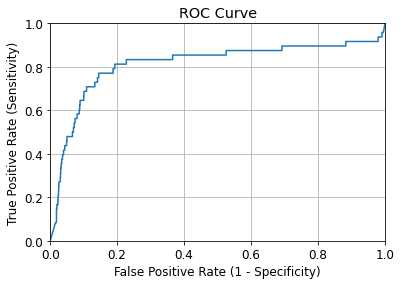

In [154]:
model_roc(naivebayes, x_test, y_test)

# Support Vector Machine

In [142]:
from sklearn import svm
linsvm = svm.SVC(kernel='linear', probability=True)
linsvm.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

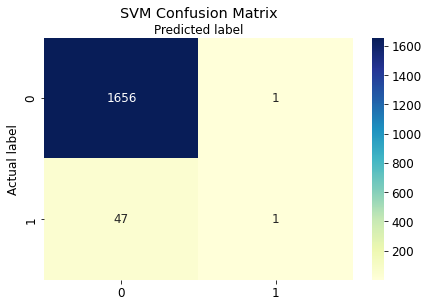

In [143]:
confusion_matrix(linsvm, x_test, y_test, 'SVM Confusion Matrix')

In [172]:
model_metrics(linsvm, x_test, y_test)

SVC(kernel='linear', probability=True)
Accuracy: 0.9718475073313783
  Compare with Null Accuracy: 0.9718475073313783
Precision: 0.5
Sensitivity: 0.020833333333333332
Specificity: 0.9993964996982498
False Positive Rate: 0.0006035003017501595
F1 score: 0.039999999999999994


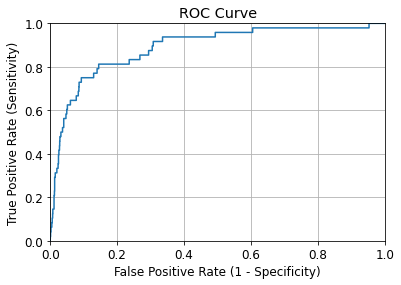

In [155]:
model_roc(linsvm, x_test, y_test)

In [160]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [161]:
# print best parameter after tuning
print(grid.best_params_)
 
# print model after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [173]:
#grid_predictions = grid.predict(x_test)
model_metrics(grid, x_test, y_test)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)
Accuracy: 0.9718475073313783
  Compare with Null Accuracy: 0.9718475073313783
Precision: 0.5
Sensitivity: 0.0625
Specificity: 0.9981894990947495
False Positive Rate: 0.0018105009052504784
F1 score: 0.1111111111111111


# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

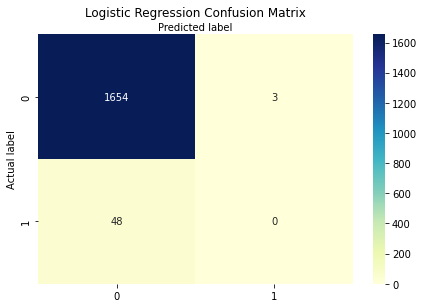

In [117]:
confusion_matrix(logreg, x_test, y_test, 'Logistic Regression Confusion Matrix')

In [174]:
model_metrics(logreg, x_test, y_test)

LogisticRegression()
Accuracy: 0.9700879765395894
  Compare with Null Accuracy: 0.9718475073313783
Precision: 0.0
Sensitivity: 0.0
Specificity: 0.9981894990947495
False Positive Rate: 0.0018105009052504784
F1 score: 0.0


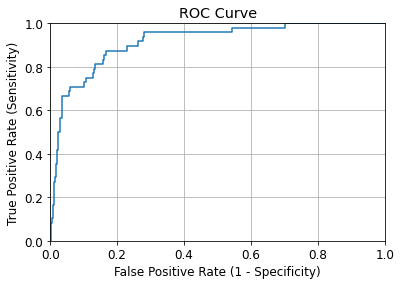

In [156]:
model_roc(logreg, x_test, y_test)